In [2]:
# import libraries
%matplotlib inline
import numpy as np
#import csv
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ulmo
import os
import scipy.spatial
import scipy.stats
import ulmo

In [22]:
# functions
def prettify_plot(): 
    ""'Hides top and rightmos axis spines and also some other stuff. '""
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_axis_bgcolor('none')
    plt.grid(b=False, which='major')
    
def color_scatter_years(x,y,title, xlabel, ylabel): 
    fig, ax = plt.subplots()
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    cmap = plt.cm.get_cmap('Greys_r', 7)
    cax = ax.scatter(x[ind],y[ind], c = x[ind].index, cmap = cmap)# cmap = plt.cm.bone)
    #plt.scatter(x[ind],y[ind], c = x[ind].index, cmap = plt.cm.bone)
    cbar = fig.colorbar(cax, ticks=[1985,1995, 2005, 2015], orientation='horizontal')
    #plt.colorbar()
    cbar.ax.set_xticklabels(['1985','1995', '2005', '2015'])  # horizontal colorbar
    ax.plot(x, m*x+b, color = 'black')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    ax.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    ax.annotate('r = %.2f'%(r), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    ax.annotate('p = %.2f'%(p), xy=(.5, .7), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    ax.annotate('N = %i'%(ind.shape), xy=(.5, .6), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m,r,p
def color_scatter(x,y,title, xlabel, ylabel): 
    fig, ax = plt.subplots()
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    cax = ax.scatter(x[ind],y[ind], c = x[ind].index, cmap = plt.cm.bone)
    #plt.scatter(x[ind],y[ind], c = x[ind].index, cmap = plt.cm.bone)
    cbar = fig.colorbar(cax, ticks=[6000,16800], orientation='horizontal')
    #plt.colorbar()
    cbar.ax.set_xticklabels(['1985', '2016'])  # horizontal colorbar
    ax.plot(x, m*x+b, color = 'black')
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    ax.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    ax.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    ax.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    ax.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m,r,p

# plotting 
# define functions used for plotting 
def lin_trend_plot(start_x, y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y.values)# & ~np.isnan(x) # subset values that aren't NaNs
    x = np.arange(0,y.shape[0])
    m, b, r_value, p, std_err = scipy.stats.linregress(x[ind],y[ind])
    plt.scatter(x+start_x,y)
    plt.plot(x+start_x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r_value), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, b, r_value, p, std_err

def hw_scatter(x,y,title, xlabel, ylabel) : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

In [8]:
ghcn = pd.read_fwf('data/ghcnd-stations.txt', colspecs = [(0,11), (12,19), (21,29), (31,36),(38,40), (41,70), (72,74),(76,78),(80,85)], header = None) 
colnames = ['GHCN ID', 'lat', 'lon', 'elevation', 'state', 'name', 'gsn flag', 'HCN/CRN FLAG', 'WMO ID']
ghcn.columns = colnames

# append the brightness index 
BI = np.load('data/brightnessGHCN.npy')
ghcn['Brightness'] = BI
# subset the GHCN station list with the list of available stations
currentstations = ulmo.ncdc.ghcn_daily.get_stations(start_year=1985, end_year = 2016, elements = ['TMIN', 'TMAX', 'AWND'], as_dataframe=True)
currentGHCNstations = np.intersect1d(currentstations.id, ghcn.index.values) #ghcn['GHCN ID'].values)
ghcnSubset = ghcn.set_index('GHCN ID').loc[currentstations.id.values]

ghcn = ghcn.set_index('GHCN ID').loc[currentstations.id.values]

atlas = pd.read_csv('data/world_cities.csv')
tree = scipy.spatial.cKDTree(ghcn[['lon', 'lat']].values, leafsize=100)
#import sys
#sys.path.append('/../cityheat/Bmore/2015/')
#sys.path.append('/Users/annascott2/mountpoint/cityheat/Bmore/2015/')
#import spatialfunctions
#atlas = atlas[atlas['pop']> 500000]

In [17]:
(~np.isnan(urban_data['TMIN'].set_index(urban_data['TMIN'].index.to_timestamp())['1985-06-01':'2015-08-31'].value.values.astype(float))).sum()/(365*30.+90.) 

0.97454710144927537

In [18]:
brightness_threshold = 25
startdate = np.datetime64('1985-06-01')
enddate = np.datetime64('2015-08-30')
data_availability_thresh = .75

In [53]:
ghcn.Brightness[closestInds][(-ghcn.Brightness[closestInds].values).argsort()]

GHCN ID
USC00470273    62.0
USW00014837    62.0
USC00471416    61.0
USC00476838    49.0
USC00478229    47.0
USC00474790    47.0
USC00471840    44.0
USC00470516    43.0
USC00478910    39.0
USC00471078    37.0
USC00477576    32.0
USC00476718    31.0
USC00475189    29.0
USC00470308    21.0
USC00476796    15.0
Name: Brightness, dtype: float64

In [19]:
i = 6882
lat = atlas.iloc[i]['lat']
lon = atlas.iloc[i]['lng']
city = atlas.iloc[i]['city']
closeststations = tree.query([lon,lat], k =15, distance_upper_bound=1)

# Make sure the closest stations are within a finite distance
closestInds = closeststations[1][~np.isinf(closeststations[0])]
# make sure that there are stations 
if closestInds.shape[0] > 0 : 
    urban = ghcn.Brightness[closestInds].argmax()
    rural = ghcn.Brightness[closestInds].argmin()
    #         if urban != rural: 
    urban_data = ulmo.ncdc.ghcn_daily.get_data(urban, as_dataframe=True, update=False)
    rural_data = ulmo.ncdc.ghcn_daily.get_data(rural, as_dataframe=True, update=False)

    number_urban_stations = (ghcn.Brightness[closestInds] >= brightness_threshold).sum() # number of urban stations is equivalent to brightness over 30
    number_rural_stations = (ghcn.Brightness[closestInds] < brightness_threshold).sum() # number of rural stations is equivalent to brightness over 30
    delta_brightness = 30
    break_value = -1

    iii = 1
#        while ('TMAX' not in urban_data.keys() or 'TMIN' not in urban_data.keys()) or (urban_data['TMAX'].index[0].to_timestamp().to_datetime() > startdate) or (urban_data['TMAX'].index[-1].to_timestamp().to_datetime() < enddate) : 
    while ('TMAX' not in urban_data.keys()) or ('TMIN' not in urban_data.keys()) or (urban_data['TMAX'].index[0].to_timestamp() > startdate) or (urban_data['TMAX'].index[-1].to_timestamp() < enddate) or ((~np.isnan(urban_data['TMIN'].set_index(urban_data['TMIN'].index.to_timestamp())['1985-06-01':'2015-08-31'].value.values.astype(float))).sum()/(365*30.+90.) < data_availability_thresh) : 
    # check if there's enough suitable urban stations to check the next one, ignoring the current one 
        if iii > number_urban_stations-1 : 
            print('no suitable urban station for %s'%city) 
            urban = break_value
            break 
        # find the next brightestcity
        print 'finding the next urban station for %s'%city
        urban = ghcn.Brightness[closestInds][(-ghcn.Brightness[closestInds].values).argsort()].index[iii]
        urban_data = ulmo.ncdc.ghcn_daily.get_data(urban, as_dataframe=True, update=False)
        #print urban, urban_data['TMIN'].index[0], urban_data['TMIN'].index[-1], ghcn.Brightness[urban], urban_data.keys(), (~np.isnan(urban_data['TMIN'].set_index(urban_data['TMIN'].index.to_timestamp())['1985-06-01':'2015-08-31'].value.values.astype(float))).sum()/(365.*30.+90.)
        iii = iii+1    

    # if no urban station found, don't bother to pair with rural 
    if urban != break_value : 
        # check rural data station different from urban has TMIN, TMAX, a long enough record, and is rural enough compared to urban (delta_brightness)
        iii = 1
        enlarge_circle = 0 # number of times we can try increasing search radius
        while (urban ==rural) or ('TMAX' not in rural_data.keys() and 'TMIN' not in rural_data.keys()) or (rural_data['TMIN'].index[0].to_timestamp() > startdate) or (rural_data['TMIN'].index[-1].to_timestamp() < enddate) or (ghcn.Brightness[urban]-ghcn.Brightness[rural]<delta_brightness) or ((~np.isnan(rural_data['TMIN'].set_index(rural_data['TMIN'].index.to_timestamp())['1985-06-01':'2015-08-31'].value.values.astype(float))).sum()/(365*30.+90) < data_availability_thresh): 
            print 'finding the next rural station for %s'%city

            # if we can't find any suitable stations, try enlarging the search radius, but only try this once
            if iii > number_rural_stations-1 : 
                if enlarge_circle > 0 : 
                    rural = break_value
                    break #break when we've already used up all the search
                else: 
                    # find 25 closest stations within 1.5 degree circle
                    closeststations1 = tree.query([lon,lat], k =35, distance_upper_bound=1.5 ) 
                    # eliminate the ones we've already search 
                    new_stations = np.setdiff1d(closeststations1[1], closeststations[1])
                    # Make sure that we've actually found new stations, otherwise break
                    if new_stations.shape[0] >0 : 
                        # Make sure the closest stations are within a finite distance
                        closestInds1 = closeststations1[1][~np.isinf(closeststations1[0])]
                        # Eliminate repeat stations
                        closestInds = np.intersect1d(new_stations, closestInds1)
                        # reset counter, number of rural stations
                        iii = 0
                        number_rural_stations = (ghcn.Brightness[closestInds] < brightness_threshold).sum()
                    else: 
                        rural = break_value
                        break
                    # reset list of rural stations
                print 'increasing search radius'
                enlarge_circle = enlarge_circle+1

            # find the next dimmest
            rural = ghcn.Brightness[closestInds][(ghcn.Brightness[closestInds].values).argsort()].index[iii]
            rural_data = ulmo.ncdc.ghcn_daily.get_data(rural, as_dataframe=True, update=False)
            print rural, rural_data['TMIN'].index[0], rural_data['TMIN'].index[-1], ghcn.Brightness[rural], rural_data.keys(), (~np.isnan(rural_data['TMIN'].set_index(rural_data['TMIN'].index.to_timestamp())['1985-06-01':'2015-08-31'].value.values.astype(float))).sum()/(365*30.+90)
            iii = iii+1
    else: 
        rural = break_value
# else condition for not being any stations
else: 
    urban = break_value 
    rural = break_value

# save out if we've found a good pairing
if (urban != break_value) and (rural != break_value) : 
    print('Found a pair for %s'%city)

finding the next rural station for Madison
USC00470308 1962-06-01 2016-12-31 21.0 ['TMIN', 'MNPN', 'SNWD', 'WT11', 'DAPR', 'WT09', 'WT05', 'WT04', 'WT01', 'MDPR', 'WT03', 'TOBS', 'EVAP', 'MXPN', 'MDEV', 'DAWM', 'TMAX', 'SNOW', 'MDWM', 'DAEV', 'WDMV', 'WESD', 'PRCP'] 0.994655797101
Found a pair for Madison


In [54]:
urban, rural

('USC00470273', 'USC00470308')

/Users/annascott2/git/ulmo-gottscott/ulmo/ncdc/ghcn_daily/core.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe[column_name][dates] = element_df[col][months]


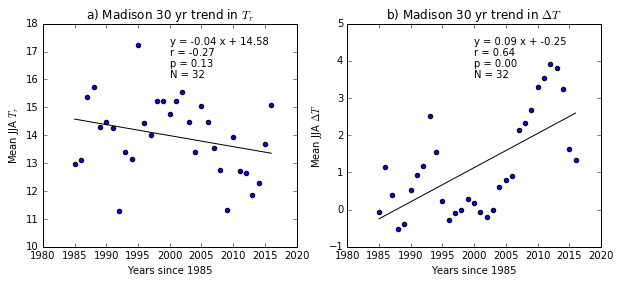

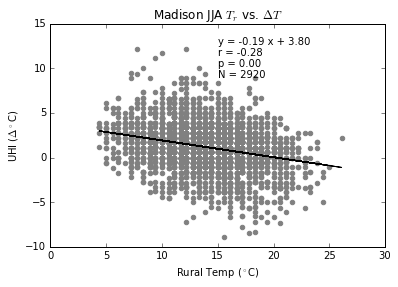

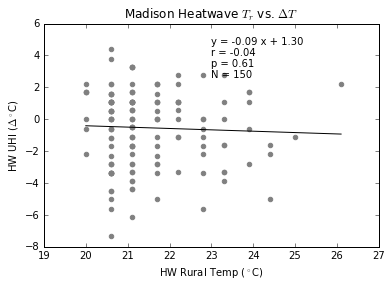

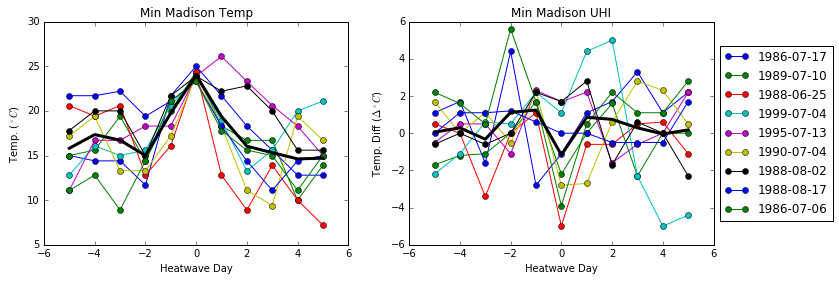

In [55]:
urban = 'USW00014837'
rural = 'USC00470308'

urban_data = ulmo.ncdc.ghcn_daily.get_data(urban, as_dataframe=True, update=False)
rural_data = ulmo.ncdc.ghcn_daily.get_data(rural, as_dataframe=True, update=False)


numhw = 150
finalhw = 50
rural_tmin = pd.to_numeric(rural_data['TMIN']['1985-01-01':].value/10.) #rural tmin
urban_tmin = pd.to_numeric(urban_data['TMIN']['1985-01-01':].value/10.) 

# extract summertime data 
rural_summer = rural_tmin[(rural_tmin.index.month >= 6) & (rural_tmin.index.month <= 8)]
urban_summer = urban_tmin[(urban_tmin.index.month >= 6) & (urban_tmin.index.month <= 8)]

# clean data: eliminate min temperatures below 4 or above 35
rural_summer = rural_summer[(rural_summer>4) & (rural_summer<35)]
urban_summer = urban_summer[(urban_summer>4) & (urban_summer < 35)]

#calculate UHI
UHI = urban_summer - rural_summer

#try:
title = '%s 30 yr trend in '%city
fig = plt.figure(figsize=[10,4] )
plt.subplot(121)
slopeT, interceptT, r_valueT, pT, std_errT = lin_trend_plot(1985,rural_summer.groupby(rural_summer.index.year).mean(),'a) ' + title + '$T_r$', 'Years since 1985','Mean JJA $T_r$')
plt.subplot(122)
slope, intercept, r_value, p, std_err = lin_trend_plot(1985, UHI.groupby(UHI.index.year).mean(),'b) ' + title + '$\Delta T$', 'Years since 1985', 'Mean JJA $\Delta T$')
    #plt.savefig(results_filepath+ '30yrtrend/%s.png'%city)
    #plt.close()
# except ValueError:
#     slopeT, interceptT, r_valueT, pT, std_errT= np.ones(5)*np.nan
#     slope, intercept, r_value, p, std_err = np.ones(5)*np.nan

######
###### Calculate heatwaves
######        
hottestmin = rural_summer.iloc[(-rural_summer.values).argsort()[:numhw]] 
minheatwaves = hottestmin[0:12]

### make sure that heatwaves aren't duplicates
Ns = []
m = 0 
for n in range(1,10): 
    old = m
    try: 
        while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
            m = m+1
    except IndexError: 
        minheatwaves = hottestmin[0:20]
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            print('out of bounds')
    try: 
        if old ==m : 
            Ns.append(minheatwaves.sort_index().index[m])
        else: 
            Ns.append(minheatwaves.sort_index()[old:m].argmax())
    except: 
        'random error'
    m = m+1
finalhw = hottestmin[Ns].sort_values(ascending=False)

######
###### Analyze summer and heatwave data
######
x = rural_summer
y = UHI
ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
#heatwaves
hw_x = rural_summer[hottestmin.index]#[np.logical_or(rural_tmin.index.month==6, rural_tmin.index.month==7, rural_tmin.index.month==8)] 
hw_y = UHI[hottestmin.index]#[np.logical_or(UHI.index.month==6, UHI.index.month==7, UHI.index.month==8)] 
hw_ind = ~np.isnan(hw_y) & ~np.isnan(hw_x) # subset values that aren't NaNs

# plot summertime temp vs UHI
plt.figure()
m, r, p = hw_scatter(x[ind],y[ind],'%s JJA $T_r$ vs. $\Delta T$'%city, 'Rural Temp ($^\circ$C)', 'UHI ($\Delta ^\circ$C)')
#plt.savefig(results_filepath+ 'JJAUHI%s%s.png'%(city.replace(" ", "")[0:5], 'min'))
#plt.close()

# plot heatwave temp vs UHI
plt.figure()
m, r, p = hw_scatter(hw_x[hw_ind],hw_y[hw_ind],'%s Heatwave $T_r$ vs. $\Delta T$'%city, 'HW Rural Temp ($^\circ$C)', 'HW UHI ($\Delta ^\circ$C)')
#plt.savefig(results_filepath+ 'hwUHI%s%s.png'%(city.replace(" ", "")[0:5], 'min'))
#plt.close()

# plot composite heatwave events
heatwaves = finalhw
compositeTemp = np.nan*np.ones([heatwaves.shape[0], 11])
compositeUHI = np.nan*np.ones([heatwaves.shape[0], 11])
ii = 0
for dates in heatwaves.index[:]: 
    compositeTemp[ii,:]= rural_tmin[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    compositeUHI[ii,:] = (urban_tmin-rural_tmin)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values# -UHI[dates.to_timestamp()]
    ii = ii+1

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
plt.title('Min %s Temp'%(city))
plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
plt.title('Min %s UHI'%(city))
plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
plt.xlabel('Heatwave Day')
plt.legend(heatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
#plt.savefig(results_filepath+'min'+'hwcomposite%s'%city.replace(" ", "")[0:5]+'.png',  bbox_inches='tight')      

(array([  7.,  14.,  17.,   3.,   4.,   3.,   1.,   4.,   1.,  16.,   6.,
          6.,   1.,  11.,   2.,  10.,  10.,   3.,   3.,   3.,   7.,   2.,
          0.,   0.,   0.,   3.,   3.,   1.,   1.,   8.]),
 array([ 1985.        ,  1986.03333333,  1987.06666667,  1988.1       ,
         1989.13333333,  1990.16666667,  1991.2       ,  1992.23333333,
         1993.26666667,  1994.3       ,  1995.33333333,  1996.36666667,
         1997.4       ,  1998.43333333,  1999.46666667,  2000.5       ,
         2001.53333333,  2002.56666667,  2003.6       ,  2004.63333333,
         2005.66666667,  2006.7       ,  2007.73333333,  2008.76666667,
         2009.8       ,  2010.83333333,  2011.86666667,  2012.9       ,
         2013.93333333,  2014.96666667,  2016.        ]),
 <a list of 30 Patch objects>)

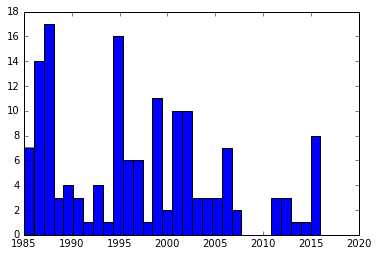

In [49]:
plt.hist(hottestmin.index.year, 30)

(-0.69859298732153752, -0.66198999019440141, 3.683598130599572e-05)

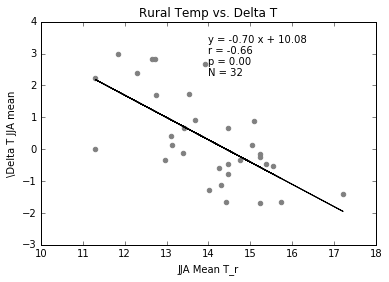

In [30]:
hw_scatter(rural_summer.groupby(rural_summer.index.year).mean(), UHI.groupby(UHI.index.year).mean(), 
          'Rural Temp vs. Delta T', 'JJA Mean T_r','\Delta T JJA mean')

In [50]:
ghcn.loc[urban]

lat                         43.041
lon                        -89.428
elevation                      263
state                           WI
name            ARBORETUM UNIV WIS
gsn flag                       NaN
HCN/CRN FLAG                   NaN
WMO ID                         NaN
Brightness                      62
Name: USC00470273, dtype: object

In [51]:
ghcn.loc[rural]

lat                            43.3
lon                         -89.326
elevation                       329
state                            WI
name            ARLINGTON UNIV FARM
gsn flag                        NaN
HCN/CRN FLAG                    NaN
WMO ID                          NaN
Brightness                       21
Name: USC00470308, dtype: object

In [571]:
hottestmin[0:12].sort_index()

month_period
1986-07-08    26.1
1991-06-30    25.6
1995-07-15    26.1
2006-08-02    26.1
2007-08-08    26.7
2010-07-24    27.8
2011-07-22    27.2
2011-07-23    25.6
2012-07-05    25.6
2012-07-08    27.8
2016-07-27    25.6
2016-08-12    26.1
Freq: D, Name: value, dtype: float64

out of bounds
out of bounds


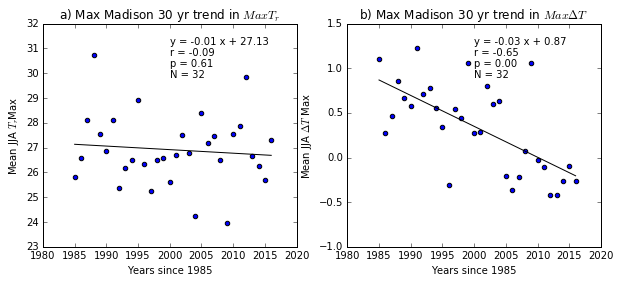

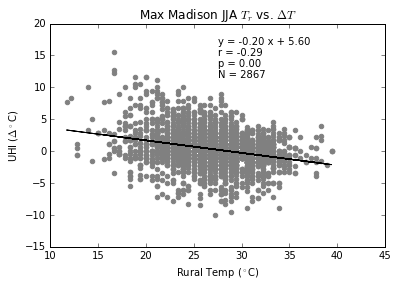

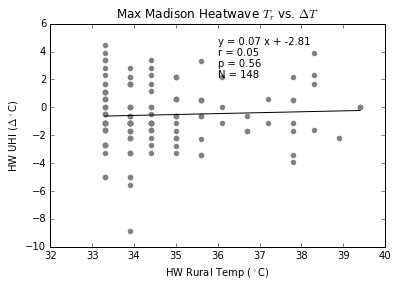

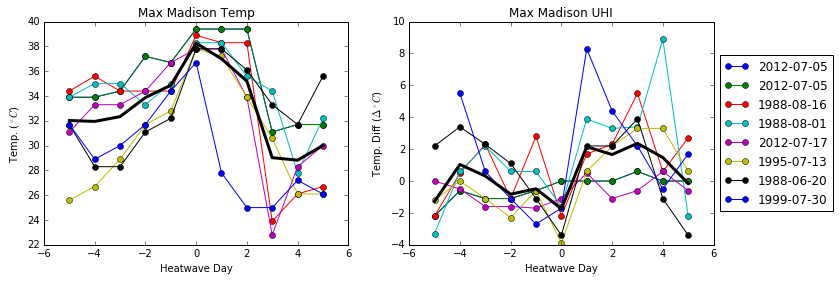

In [52]:
finalhw = 50
rural_tmin = pd.to_numeric(rural_data['TMAX']['1985-01-01':].value/10.) #rural tmin
urban_tmin = pd.to_numeric(urban_data['TMAX']['1985-01-01':].value/10.) 

# extract summertime data 
rural_summer = rural_tmin[(rural_tmin.index.month >= 6) & (rural_tmin.index.month <= 8)]
urban_summer = urban_tmin[(urban_tmin.index.month >= 6) & (urban_tmin.index.month <= 8)]

#calculate UHI
UHI = urban_summer - rural_summer

#try:
title = 'Max %s 30 yr trend in '%city
fig = plt.figure(figsize=[10,4] )
plt.subplot(121)
slopeT, interceptT, r_valueT, pT, std_errT = lin_trend_plot(1985,rural_summer.groupby(rural_summer.index.year).mean(),'a) ' + title + '$Max T_r$', 'Years since 1985','Mean JJA $T_r$Max')
plt.subplot(122)
slope, intercept, r_value, p, std_err = lin_trend_plot(1985, UHI.groupby(UHI.index.year).mean(),'b) ' + title + '$Max \Delta T$', 'Years since 1985', 'Mean JJA $\Delta T$ Max')
    #plt.savefig(results_filepath+ '30yrtrend/%s.png'%city)
    #plt.close()
# except ValueError:
#     slopeT, interceptT, r_valueT, pT, std_errT= np.ones(5)*np.nan
#     slope, intercept, r_value, p, std_err = np.ones(5)*np.nan

######
###### Calculate heatwaves
######        
hottestmin = rural_summer.iloc[(-rural_summer.values).argsort()[:numhw]] 
minheatwaves = hottestmin[0:12]

### make sure that heatwaves aren't duplicates
Ns = []
m = 0 
for n in range(1,10): 
    old = m
    try: 
        while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
            m = m+1
    except IndexError: 
        minheatwaves = hottestmin[0:20]
        try: 
            while minheatwaves.sort_index().index[m+1].to_timestamp() - minheatwaves.sort_index().index[m].to_timestamp()  < np.timedelta64(3, 'D') : 
                m = m+1
        except IndexError: 
            print('out of bounds')
    try: 
        if old ==m : 
            Ns.append(minheatwaves.sort_index().index[m])
        else: 
            Ns.append(minheatwaves.sort_index()[old:m].argmax())
    except: 
        'random error'
    m = m+1
finalhw = hottestmin[Ns].sort_values(ascending=False)

######
###### Analyze summer and heatwave data
######
x = rural_summer
y = UHI
ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
#heatwaves
hw_x = rural_summer[hottestmin.index]#[np.logical_or(rural_tmin.index.month==6, rural_tmin.index.month==7, rural_tmin.index.month==8)] 
hw_y = UHI[hottestmin.index]#[np.logical_or(UHI.index.month==6, UHI.index.month==7, UHI.index.month==8)] 
hw_ind = ~np.isnan(hw_y) & ~np.isnan(hw_x) # subset values that aren't NaNs

# plot summertime temp vs UHI
plt.figure()
m, r, p = hw_scatter(x[ind],y[ind],'Max %s JJA $T_r$ vs. $\Delta T$'%city, 'Rural Temp ($^\circ$C)', 'UHI ($\Delta ^\circ$C)')
#plt.savefig(results_filepath+ 'JJAUHI%s%s.png'%(city.replace(" ", "")[0:5], 'min'))
#plt.close()

# plot heatwave temp vs UHI
plt.figure()
m, r, p = hw_scatter(hw_x[hw_ind],hw_y[hw_ind],'Max %s Heatwave $T_r$ vs. $\Delta T$'%city, 'HW Rural Temp ($^\circ$C)', 'HW UHI ($\Delta ^\circ$C)')
#plt.savefig(results_filepath+ 'hwUHI%s%s.png'%(city.replace(" ", "")[0:5], 'min'))
#plt.close()

# plot composite heatwave events
heatwaves = finalhw
compositeTemp = np.nan*np.ones([heatwaves.shape[0], 11])
compositeUHI = np.nan*np.ones([heatwaves.shape[0], 11])
ii = 0
for dates in heatwaves.index[:]: 
    compositeTemp[ii,:]= rural_tmin[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values
    compositeUHI[ii,:] = (urban_tmin-rural_tmin)[dates.to_timestamp()-pd.DateOffset(days=5):dates.to_timestamp()+pd.DateOffset(days=5)].values# -UHI[dates.to_timestamp()]
    ii = ii+1

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
tHandle = plt.plot(np.arange(-5,6,1),compositeTemp.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeTemp, axis=0), linewidth = 3, color = 'black')
plt.title('Max %s Temp'%(city))
plt.ylabel('Temp. ($^\circ C$)')
plt.xlabel('Heatwave Day')

plt.subplot(1,2,2)    
uhiHandle = plt.plot(np.arange(-5,6,1),compositeUHI.T, '-o')
plt.plot(np.arange(-5,6,1),np.nanmean(compositeUHI, axis=0), linewidth = 3,color = 'black')
plt.title('Max %s UHI'%(city))
plt.ylabel('Temp. Diff ($\Delta ^\circ C$)')
plt.xlabel('Heatwave Day')
plt.legend(heatwaves.index, loc = 'center left', bbox_to_anchor=(1.0, 0.5))
#plt.savefig(results_filepath+'min'+'hwcomposite%s'%city.replace(" ", "")[0:5]+'.png',  bbox_inches='tight')      